In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

count_data = pd.read_csv('C:/Users/HP/Desktop/Dr. Shamshiripour/TmcCount.CSV')
count_data['StartDate'] = (count_data['StartDate'] / 1e9).astype(int).astype(str)
count_data['StartDate'] = pd.to_datetime(count_data['StartDate'], format='%Y%m%d', errors = 'coerce')
count_data['Year'] = count_data['StartDate'].dt.year
count_data.dropna(subset = ['IntersectionId', 'Year'], inplace = True)
count_data['IntersectionId'] = count_data['IntersectionId'].astype(int)

chunks = []
for chunk in pd.read_csv('C:/Users/HP/Desktop/Dr. Shamshiripour/TmcCountData.CSV', chunksize = 50000):
    chunk = chunk.merge(count_data, on = 'CountId', how = 'inner')
    chunk['TotalCount'] = chunk[['HardLeftMovement', 'LeftMovement', 'BearLeftMovement', 'ThruOrPedMovement', 
    'BearRightMovement', 'RightMovement', 'HardRightMovement', 'UTurnMovement']].sum(axis = 1)
    chunk = chunk[chunk['ClassificationId'] == 1]
    chunks.append(chunk)
cars = pd.concat(chunks, ignore_index = True)
car_daily_summary = cars.groupby(['IntersectionId', 'Year', 'StartDate'])['TotalCount'].sum().reset_index()
car_annual_summary = car_daily_summary.groupby(['IntersectionId', 'Year'])['TotalCount'].mean().reset_index()
car_annual_summary.columns = ['IntersectionId', 'Year', 'AverageTotalCount']
car_annual_summary = car_annual_summary.sort_values(by = ['IntersectionId', 'Year'])

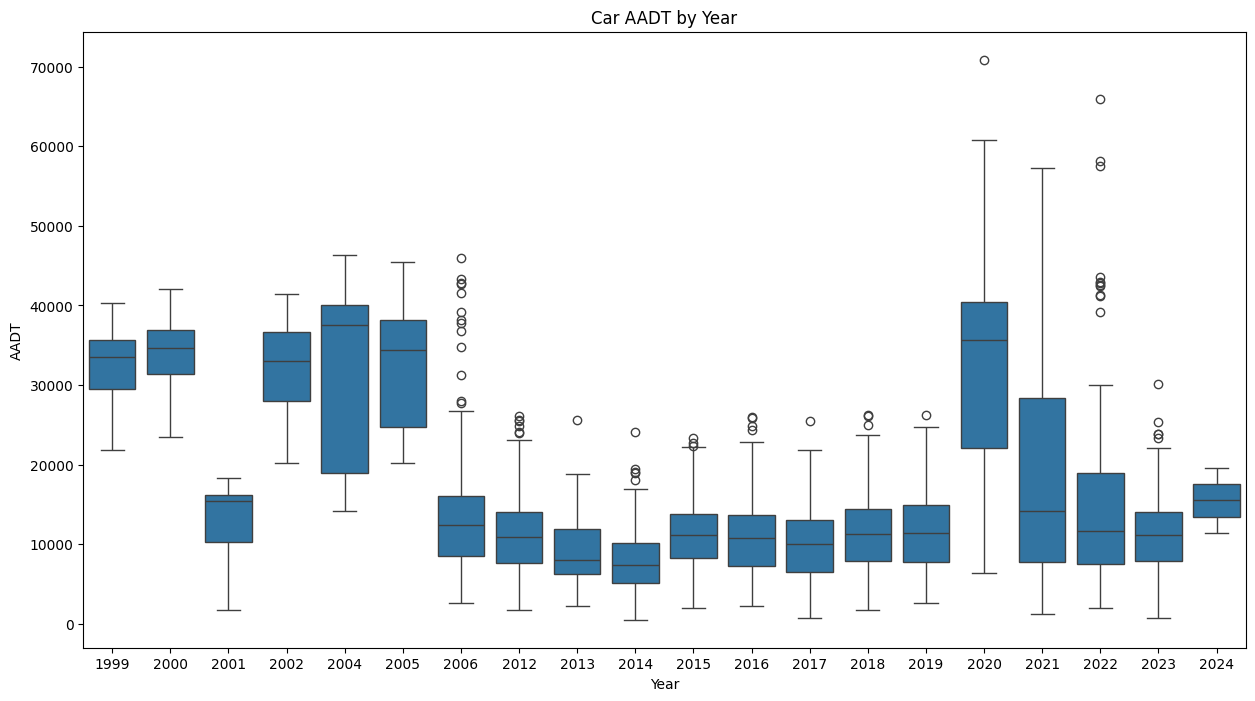

In [21]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'Year', y = 'AverageTotalCount', data = car_annual_summary)
plt.title('Car AADT by Year')
plt.xlabel('Year')
plt.ylabel('AADT')
plt.show()

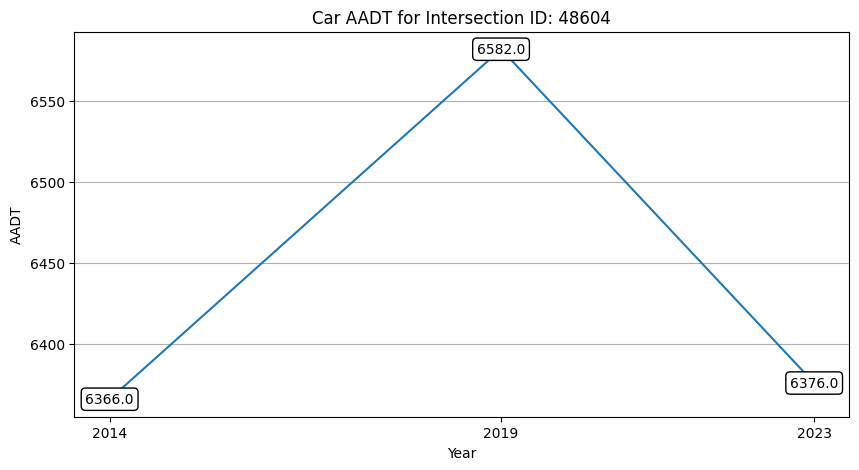

In [ ]:
def car_aadt():
    user_intersection_id = int(input('Enter Intersection ID: '))
    intersection_data = car_annual_summary[car_annual_summary['IntersectionId'] == user_intersection_id]
    if intersection_data.empty:
        print(f'No data found for Intersection ID: {user_intersection_id}')
    else:
        plt.figure(figsize = (10, 5))
        plt.plot(intersection_data['Year'], intersection_data['AverageTotalCount'], marker = 'o')
        for index, row in intersection_data.iterrows():
            plt.text(row['Year'], row['AverageTotalCount'], str(row['AverageTotalCount']), 
                     ha = 'center', va = 'center',
                     bbox = dict(facecolor = 'white', edgecolor = 'black', boxstyle = 'round, pad = 0.3'))
        plt.title(f'Car AADT for Intersection ID: {user_intersection_id}')
        plt.xlabel('Year')
        plt.ylabel('AADT')
        plt.xticks(intersection_data['Year'])
        plt.grid(axis = 'y')
        plt.show()
car_aadt()

In [ ]:
chunks = []
for chunk in pd.read_csv('C:/Users/HP/Desktop/Dr. Shamshiripour/TmcCountData.CSV', chunksize = 50000):
    chunk = chunk.merge(count_data, on = 'CountId', how = 'inner')
    chunk['TotalCount'] = chunk[['HardLeftMovement', 'LeftMovement', 'BearLeftMovement', 'ThruOrPedMovement', 'BearRightMovement', 'RightMovement', 'HardRightMovement', 'UTurnMovement']].sum(axis = 1)
    chunk = chunk[chunk['ClassificationId'] == 2]
    chunks.append(chunk)

trucks = pd.concat(chunks, ignore_index = True)
truck_daily_summary = trucks.groupby(['IntersectionId', 'Year', 'StartDate'])['TotalCount'].sum().reset_index()
truck_annual_summary = truck_daily_summary.groupby(['IntersectionId', 'Year'])['TotalCount'].mean().reset_index()
truck_annual_summary.columns = ['IntersectionId', 'Year', 'AverageTotalCount']
truck_annual_summary = truck_annual_summary.sort_values(by = ['IntersectionId', 'Year'])

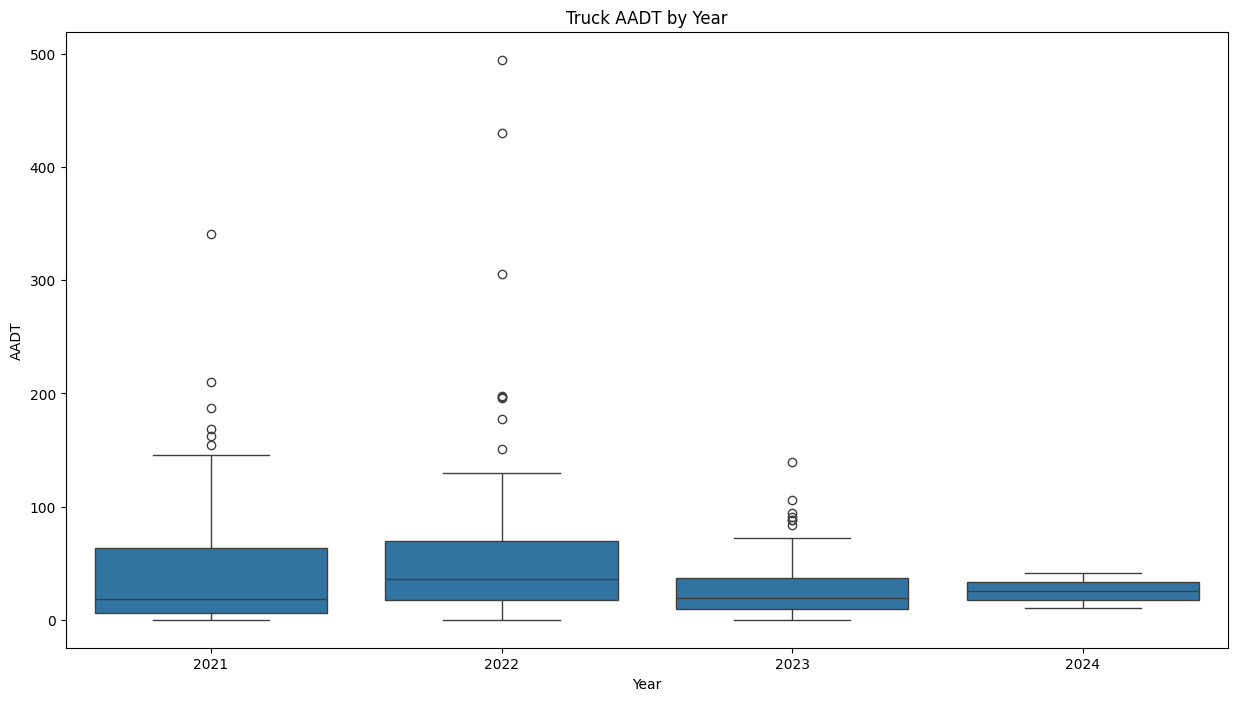

In [ ]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'Year', y = 'AverageTotalCount', data = truck_annual_summary)
plt.title('Truck AADT by Year')
plt.xlabel('Year')
plt.ylabel('AADT')
plt.show()

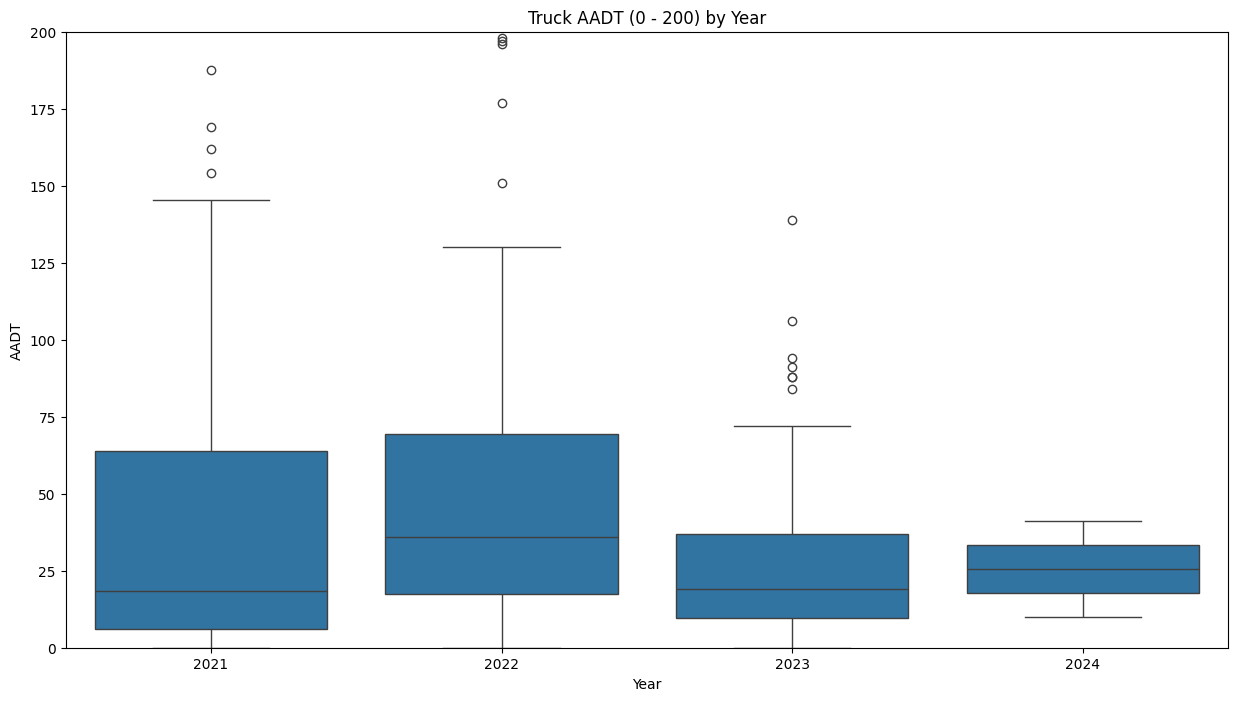

In [27]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'Year', y = 'AverageTotalCount', data = truck_annual_summary)
plt.title('Truck AADT (0 - 200) by Year')
plt.xlabel('Year')
plt.ylabel('AADT')
plt.ylim(0, 200)
plt.show()

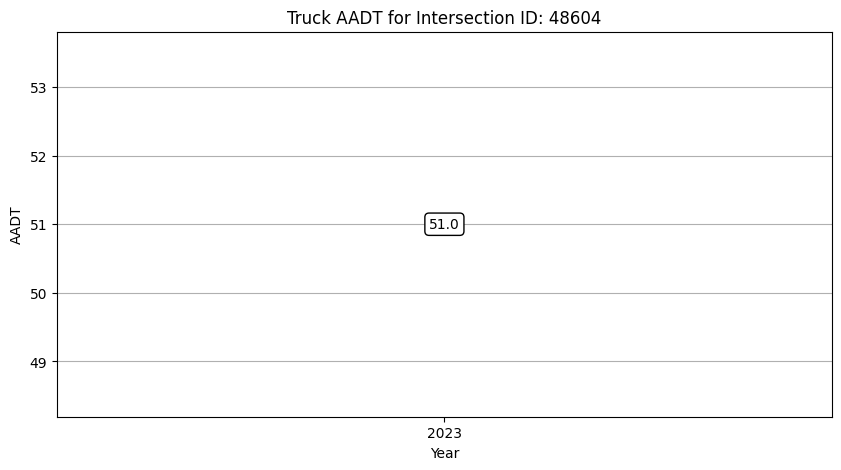

In [23]:
def truck_aadt():
    user_intersection_id = int(input('Enter Intersection ID: '))
    intersection_data = truck_annual_summary[truck_annual_summary['IntersectionId'] == user_intersection_id]
    if intersection_data.empty:
        print(f'No data found for Intersection ID: {user_intersection_id}')
    else:
        plt.figure(figsize = (10, 5))
        plt.plot(intersection_data['Year'], intersection_data['AverageTotalCount'], marker = 'o')
        for index, row in intersection_data.iterrows():
            plt.text(row['Year'], row['AverageTotalCount'], str(row['AverageTotalCount']), 
                     ha = 'center', va = 'center',
                     bbox = dict(facecolor = 'white', edgecolor = 'black', boxstyle = 'round, pad = 0.3'))
        plt.title(f'Truck AADT for Intersection ID: {user_intersection_id}')
        plt.xlabel('Year')
        plt.ylabel('AADT')
        plt.xticks(intersection_data['Year'])
        plt.grid(axis = 'y')
        plt.show()

truck_aadt()

In [ ]:
chunks = []
for chunk in pd.read_csv('C:/Users/HP/Desktop/Dr. Shamshiripour/TmcCountData.CSV', chunksize = 50000):
    chunk = chunk.merge(count_data, on = 'CountId', how = 'inner')
    chunk['TotalCount'] = chunk[['HardLeftMovement', 'LeftMovement', 'BearLeftMovement', 'ThruOrPedMovement', 'BearRightMovement', 'RightMovement', 'HardRightMovement', 'UTurnMovement']].sum(axis = 1)
    chunk = chunk[chunk['ClassificationId'] == 3]
    chunks.append(chunk)

bikes = pd.concat(chunks, ignore_index = True)
bike_daily_summary = bikes.groupby(['IntersectionId', 'Year', 'StartDate'])['TotalCount'].sum().reset_index()
bike_annual_summary = bike_daily_summary.groupby(['IntersectionId', 'Year'])['TotalCount'].mean().reset_index()
bike_annual_summary.columns = ['IntersectionId', 'Year', 'AverageTotalCount']
bike_annual_summary = bike_annual_summary.sort_values(by = ['IntersectionId', 'Year'])

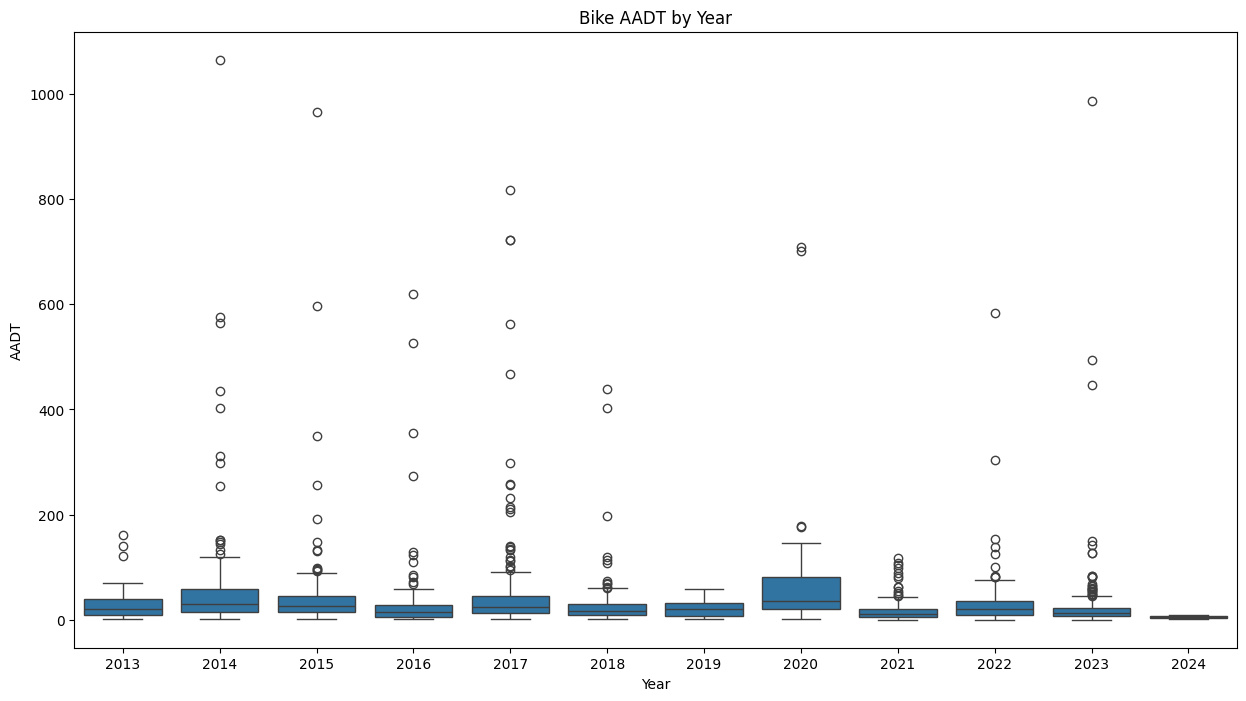

In [19]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'Year', y = 'AverageTotalCount', data = bike_annual_summary)
plt.title('Bike AADT by Year')
plt.xlabel('Year')
plt.ylabel('AADT')
plt.show()

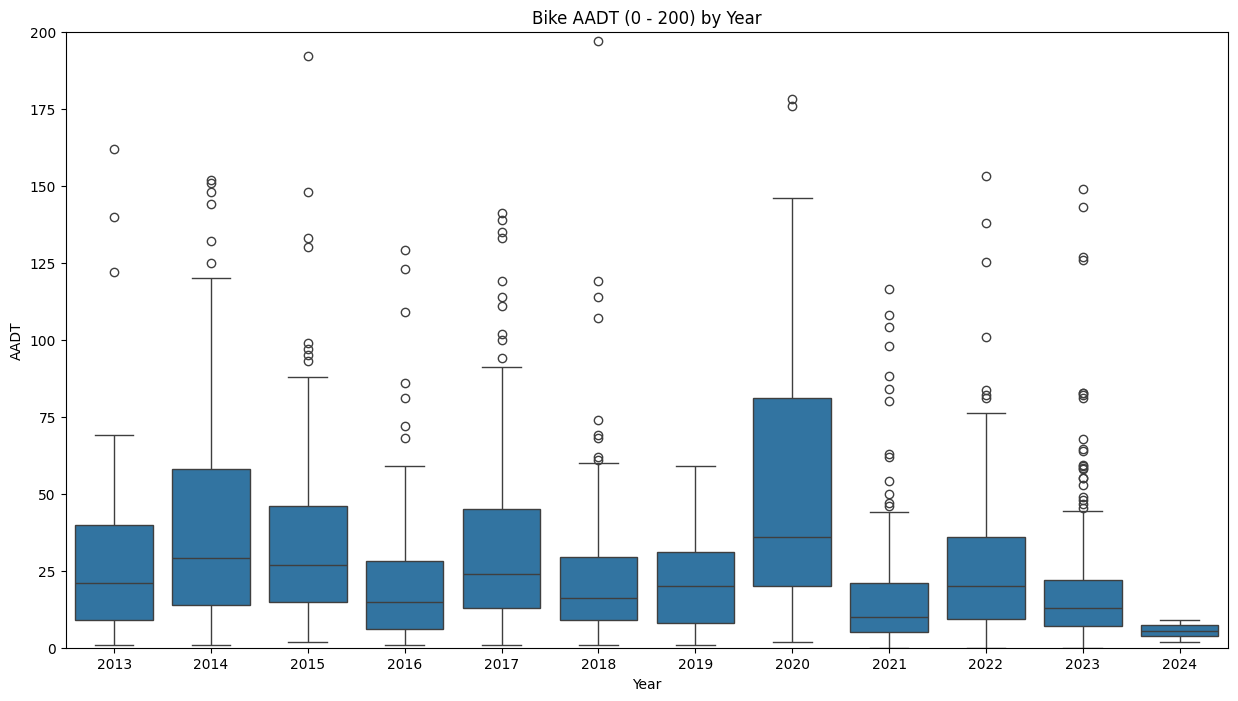

In [26]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'Year', y = 'AverageTotalCount', data = bike_annual_summary)
plt.title('Bike AADT (0 - 200) by Year')
plt.xlabel('Year')
plt.ylabel('AADT')
plt.ylim(0, 200)
plt.show()

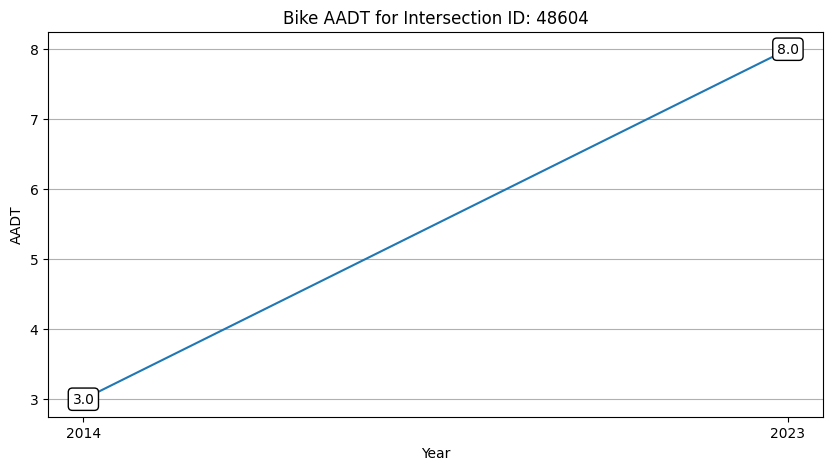

In [25]:
def bike_aadt():
    user_intersection_id = int(input('Enter Intersection ID: '))
    intersection_data = bike_annual_summary[bike_annual_summary['IntersectionId'] == user_intersection_id]
    if intersection_data.empty:
        print(f'No data found for Intersection ID: {user_intersection_id}')
    else:
        plt.figure(figsize = (10, 5))
        plt.plot(intersection_data['Year'], intersection_data['AverageTotalCount'], marker = 'o')
        for index, row in intersection_data.iterrows():
            plt.text(row['Year'], row['AverageTotalCount'], str(row['AverageTotalCount']), 
                     ha = 'center', va = 'center',
                     bbox = dict(facecolor = 'white', edgecolor = 'black', boxstyle = 'round, pad = 0.3'))
        plt.title(f'Bike AADT for Intersection ID: {user_intersection_id}')
        plt.xlabel('Year')
        plt.ylabel('AADT')
        plt.xticks(intersection_data['Year'])
        plt.grid(axis = 'y')
        plt.show()

bike_aadt()

In [ ]:
chunks = []
for chunk in pd.read_csv('C:/Users/HP/Desktop/Dr. Shamshiripour/TmcCountData.CSV', chunksize = 50000):
    chunk = chunk.merge(count_data, on = 'CountId', how = 'inner')
    chunk['TotalCount'] = chunk[['HardLeftMovement', 'LeftMovement', 'BearLeftMovement', 'ThruOrPedMovement', 'BearRightMovement', 'RightMovement', 'HardRightMovement', 'UTurnMovement']].sum(axis = 1)
    chunk = chunk[chunk['ClassificationId'] == 4]
    chunks.append(chunk)

pedestrians = pd.concat(chunks, ignore_index = True)
pedestrian_daily_summary = pedestrians.groupby(['IntersectionId', 'Year', 'StartDate'])['TotalCount'].sum().reset_index()
pedestrian_annual_summary = pedestrian_daily_summary.groupby(['IntersectionId', 'Year'])['TotalCount'].mean().reset_index()
pedestrian_annual_summary.columns = ['IntersectionId', 'Year', 'AverageTotalCount']
pedestrian_annual_summary = pedestrian_annual_summary.sort_values(by = ['IntersectionId', 'Year'])

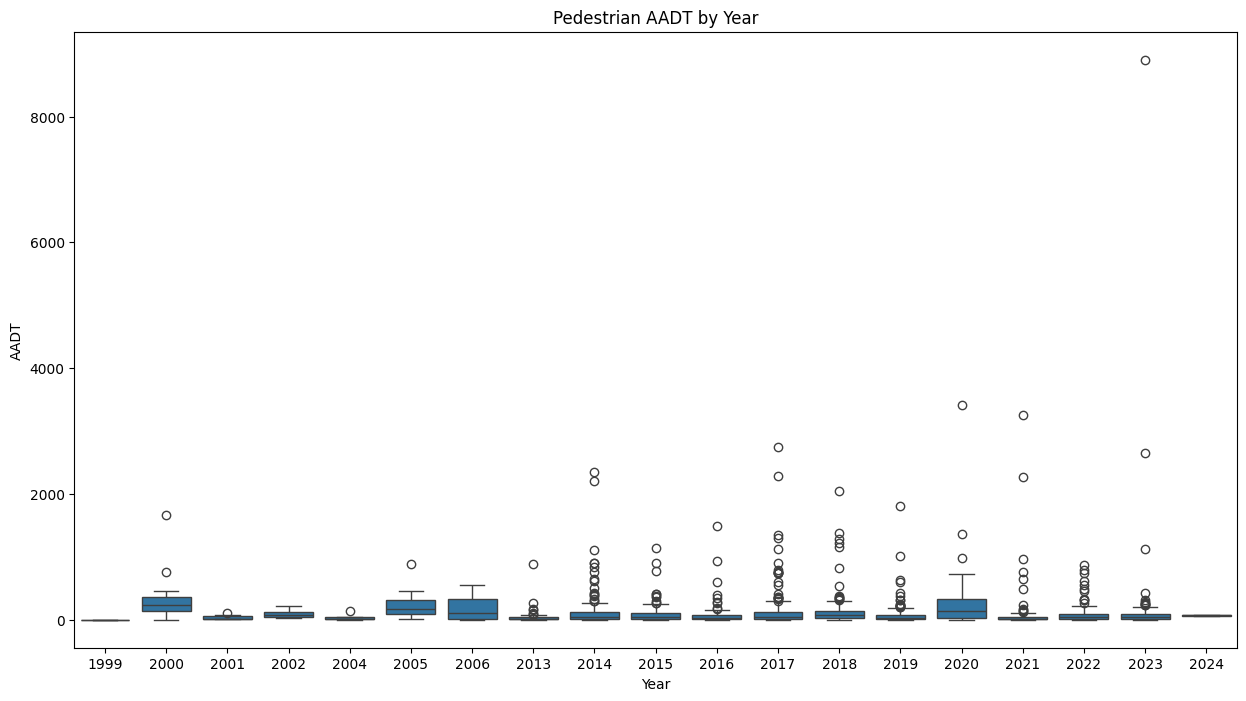

In [18]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'Year', y = 'AverageTotalCount', data = pedestrian_annual_summary)
plt.title('Pedestrian AADT by Year')
plt.xlabel('Year')
plt.ylabel('AADT')
plt.show()

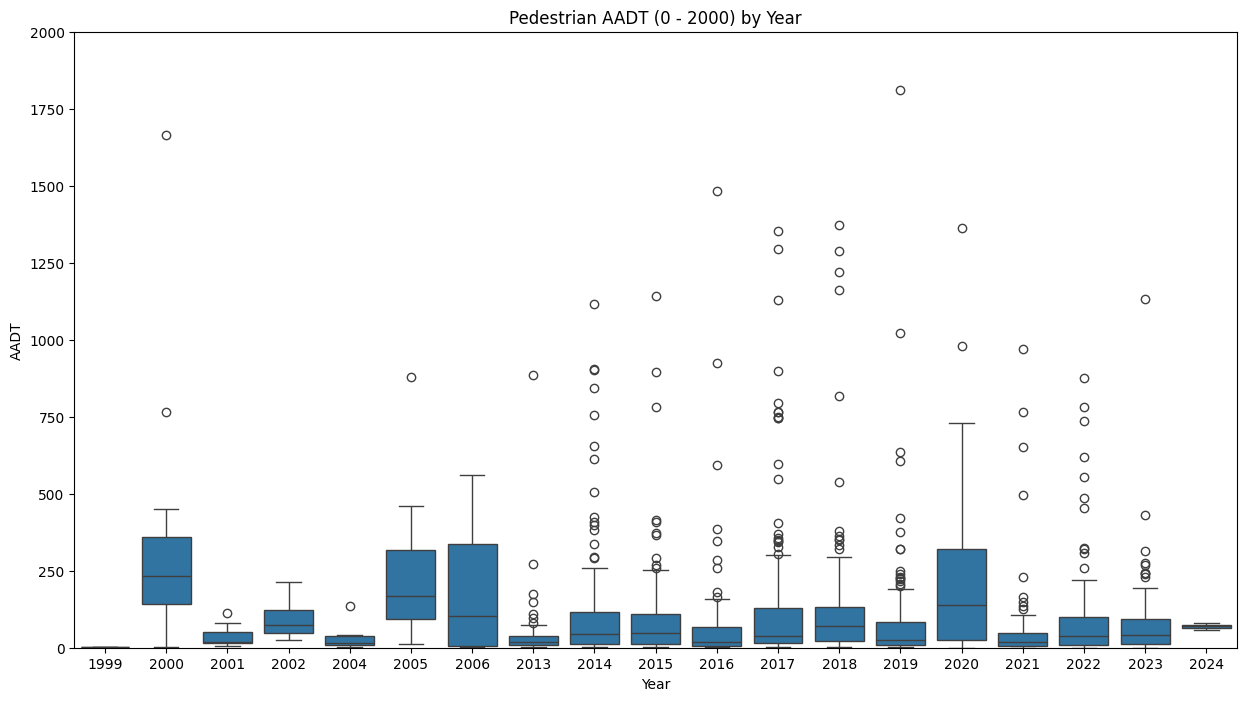

In [25]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'Year', y = 'AverageTotalCount', data = pedestrian_annual_summary)
plt.title('Pedestrian AADT (0 - 2000) by Year')
plt.xlabel('Year')
plt.ylabel('AADT')
plt.ylim(0, 2000)
plt.show()

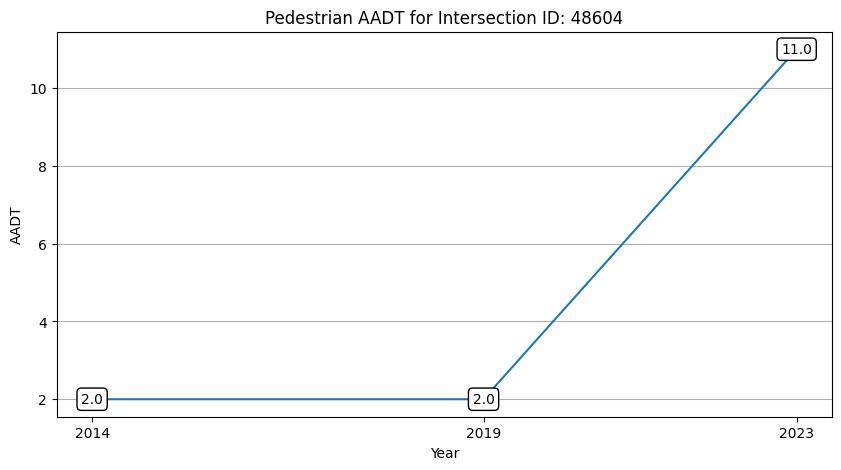

In [29]:
def pedestrian_aadt():
    user_intersection_id = int(input('Enter Intersection ID: '))
    intersection_data = pedestrian_annual_summary[pedestrian_annual_summary['IntersectionId'] == user_intersection_id]
    if intersection_data.empty:
        print(f'No data found for Intersection ID: {user_intersection_id}')
    else:
        plt.figure(figsize = (10, 5))
        plt.plot(intersection_data['Year'], intersection_data['AverageTotalCount'], marker = 'o')
        for index, row in intersection_data.iterrows():
            plt.text(row['Year'], row['AverageTotalCount'], str(row['AverageTotalCount']), 
                     ha = 'center', va = 'center',
                     bbox = dict(facecolor = 'white', edgecolor = 'black', boxstyle = 'round, pad = 0.3'))
        plt.title(f'Pedestrian AADT for Intersection ID: {user_intersection_id}')
        plt.xlabel('Year')
        plt.ylabel('AADT')
        plt.xticks(intersection_data['Year'])
        plt.grid(axis = 'y')
        plt.show()

pedestrian_aadt()